In [1]:
%pylab inline
from casacore.tables import table

Populating the interactive namespace from numpy and matplotlib


The goal of this tutorial is to introduce the student to the `tables` module of the `casacore` library. This module, in particular the `tables.table()` function allows access to the visibility data stored in a measurement set.

In [2]:
vis = "kat-7-small.ms" # create variable that refers to the measurement set

The `tables.table()` function takes the name (or path) of a measurement set and returns an object that can be used to access the *main table* of the measurement set. Here I store this object in an variable called `tab`

In [3]:
tab = table(vis)

Successful readonly open of default-locked table kat-7-small.ms: 22 columns, 23820 rows


The `tab` object has a number of useful functions, but we will only explore the main ones here. Let's start with the `tab.colnames()` function which returns the names of the columns in the MS

In [4]:
tab.colnames()

['UVW',
 'FLAG',
 'FLAG_CATEGORY',
 'WEIGHT',
 'SIGMA',
 'ANTENNA1',
 'ANTENNA2',
 'ARRAY_ID',
 'DATA_DESC_ID',
 'EXPOSURE',
 'FEED1',
 'FEED2',
 'FIELD_ID',
 'FLAG_ROW',
 'INTERVAL',
 'OBSERVATION_ID',
 'PROCESSOR_ID',
 'SCAN_NUMBER',
 'STATE_ID',
 'TIME',
 'TIME_CENTROID',
 'DATA']

| Column | Descreption |
|:-----------|:-------------|    
| ANTENNA1 |	First antenna in baseline |   
| ANTENNA2	| Second antenna in baseline |  
| FIELD_ID	| Field (source no.) identification |  
| DATA_DESC_ID |	Spectral window number, polarization identifier pair (IF no.) |  
| ARRAY_ID	| Subarray number |  
| OBSERVATION_ID	| Observation identification |  
| POLARIZATION_ID |	Polarization identification |  
| SCAN_NUMBER |	Scan number |  
| TIME  |	Integration midpoint time |  
| UVW	| UVW coordinates |  
| DATA | complex visbility data |


These data in these columns can then be accessed through the `tab.getcol()` function which takes the name of a column and returns the data in requested column (numpy array). For example, to get the observed data we run

In [6]:
data = tab.getcol('DATA')

Next, let's see the shape this data

In [7]:
data.shape

(23820, 608, 2)

This array has 23820 rows, 608 frequency channels and 2 correlations. The rows are the *number of baselines $\times$ number of time samples*. 

The measurement set also has multiple subtables which hold more detailed information about some of the data in the columns. These are:

POLARIZATION  
PROCESSOR  
SPECTRAL_WINDOW  
POINTING  
DATA_DESCRIPTION  
STATE  
HISTORY  
SOURCE  
ANTENNA  
FIELD  
FEED  
FLAG_CMD  
OBSERVATION  

Let us open the ANTENNA and use it to verify that the number of rows is the product of the time samples and the number of baselines

In [8]:
anttab = table(f"{vis}::ANTENNA")
print(anttab)

Successful readonly open of default-locked table kat-7-small.ms::ANTENNA: 8 columns, 6 rows
Table: /home/shreyam/Documents/EPFL/RadioSkyII/RadioSkyII_JupyterNotebooks_ScratchDirectory/Week5/kat-7-small.ms/ANTENNA
6 rows
8 columns: OFFSET POSITION TYPE DISH_DIAMETER FLAG_ROW MOUNT NAME STATION


This table has 6 rows, one for each antenna. The MS therefore has 6 antennas, and 6(6-1)/2 baselines

In [9]:
baselines = 6*(6-1)/2

The number of time samples can be obtained from the TIME column of the main table `tab`. But note that each time sample will have a measurement for each baselines, therefore we must only consider unique times from this array

In [10]:
times = tab.getcol('TIME')
unique_times = numpy.unique(times)

ntimes = len(times)
utimes = len(unique_times)

print(f"This MS has {ntimes}, and {utimes} of them are unique")

This MS has 23820, and 1588 of them are unique


If everything went well then this expression should return 'True'

In [10]:
baselines == ntimes/utimes

True

Now, let us plot the $uv$ coordinates of the baselines between the antennas indexed 3 and 4

Text(0, 0.5, 'v (m)')

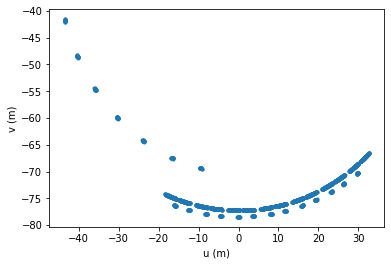

In [11]:
A1 = tab.getcol("ANTENNA1")
A2 = tab.getcol("ANTENNA2")
uvw = tab.getcol("UVW")
bl_34 = numpy.logical_and(A1==3, A2==4)
vis_34 = uvw[bl_34]

pylab.plot(vis_34[:,0], vis_34[:,1], '.')
pylab.xlabel("u (m)")
pylab.ylabel("v (m)")

Note that these are the coordinates for all the fields in the MS. To get the uv coordinates for the field indexed zero, we need to add another condition

Text(0, 0.5, 'v (m)')

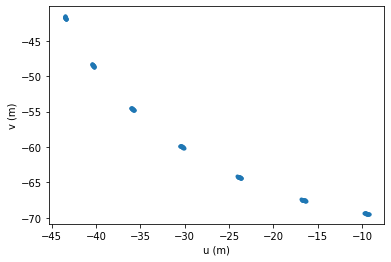

In [12]:
FID = tab.getcol("FIELD_ID")
bl_34_field_0 = numpy.logical_and(bl_34, FID==0)
vis_34_field_0 = uvw[bl_34_field_0]
pylab.plot(vis_34_field_0[:,0], vis_34_field_0[:,1], '.')
pylab.xlabel("u (m)")
pylab.ylabel("v (m)")

Now, let's colour the point according to the visibility amplitude, and add a colourbar.

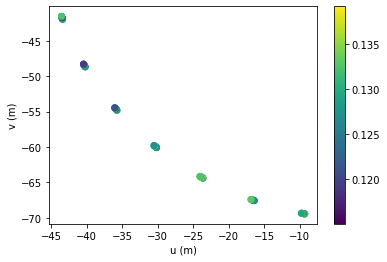

In [13]:
# get amplitudes of visibilities for baseline 3,4 and field 0. Also select the first channel and correlation
amp = abs(data[bl_34_field_0][:,0,0]) 
pylab.scatter(vis_34_field_0[:,0], vis_34_field_0[:,1], c=amp)
pylab.xlabel("u (m)")
pylab.ylabel("v (m)")
pylab.colorbar()